<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recupero il dataset

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-27 07:39:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.130.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   174MB/s    in 0.6s    

2022-08-27 07:39:59 (174 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
#!ls pizza_steak/train/steak

In [2]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are  {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are  2 directories and 0 images in 'pizza_steak'.
There are  2 directories and 0 images in 'pizza_steak/test'.
There are  0 directories and 250 images in 'pizza_steak/test/steak'.
There are  0 directories and 250 images in 'pizza_steak/test/pizza'.
There are  2 directories and 0 images in 'pizza_steak/train'.
There are  0 directories and 750 images in 'pizza_steak/train/steak'.
There are  0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [3]:
# Get the classnames

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
print(data_dir.glob('*'))
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

<generator object Path.glob at 0x7f699db3a450>
['pizza' 'steak']


In [4]:
# Visualize Images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = target_dir + "/" + target_class
  # get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read and plot the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['976382.jpg']
Image shape: (512, 512, 3)


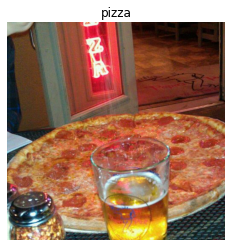

In [ ]:
img = view_random_image("pizza_steak/train", "pizza")

['482022.jpg']
Image shape: (512, 512, 3)


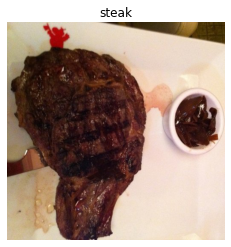

In [ ]:
img = view_random_image("pizza_steak/train", "steak")

In [ ]:
# View the image shape

img.shape # width height, colour channels

(512, 512, 3)

# End to end CNN

In [5]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing data (Normalize pixel value tra 0 e 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32,target_size=(224,224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32,target_size=(224,224), class_mode="binary", seed=42)

# Build the CNN Model (Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
)

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 235ms/step - loss: 0.5623 - accuracy: 0.7053 - val_loss: 0.4451 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4324 - accuracy: 0.8033 - val_loss: 0.3503 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3835 - accuracy: 0.8267 - val_loss: 0.4619 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3841 - accuracy: 0.8193 - val_loss: 0.3595 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3441 - accuracy: 0.8573 - val_loss: 0.3259 - val_accuracy: 0.8580


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Use a NON CNN Model

In [7]:
# set random seed
tf.random.set_seed(42)
# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile
model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# Fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.9023 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [10]:
# set random seed
tf.random.set_seed(42)
# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile
model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 3.8355 - accuracy: 0.6087 - val_loss: 0.6415 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.7084 - accuracy: 0.7067 - val_loss: 0.5015 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6586 - accuracy: 0.7273 - val_loss: 1.3514 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6773 - accuracy: 0.7180 - val_loss: 0.5198 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6360 - accuracy: 0.7300 - val_loss: 0.4602 - val_accuracy: 0.7860


In [11]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               15052900  
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Understanding CNN Model

## Binary Classification

['2435316.jpg']
Image shape: (384, 512, 3)
['3314176.jpg']
Image shape: (512, 512, 3)


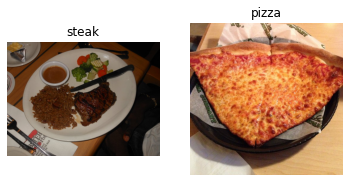

In [16]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train', 'pizza')

In [ ]:
# Prepare the data (Preprocess)

# Define dir dataset paths

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'


## Turn data into batches (small subset of data) to much image might not fit into the memory of the processor


In [18]:
# Create train and test data generators and rescale the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [19]:
# Load image from dir and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode='binary', batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode='binary', batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels) # 32 immagini e 32 label (batch_size)

(32, 32)

In [23]:
# number of batches =====>  47 Batches (1500 total images / 32 batch size)
len(train_data)

47

In [26]:
# Get the images
# images[2:,], images[0].shape

In [28]:
# Labels (0 e 1, classificazione binaria)
labels

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.],
      dtype=float32)

## Create a Baseline Model

Simple model to setup when beginning a ML experiment.

In [31]:
# Import 
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

In [33]:
# Create a simple model
model_3 = Sequential([
    Conv2D(filters=10, input_shape=(224,224,3), kernel_size=3, padding='valid', strides=1, activation='relu'), # Input Layer
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # Output layer (1 = binary classification)
])